주제 : 워싱턴D.C소재의 자전거 대여 회사의 데이터를 이용, 특정 시간대 얼마나 많은 사람들이 자전거를 대여하는지 예측

Columns
1. datetime - 시간 연-월-일 시:분:초 (ex> 2022-10-23 12:00:00은 2022년 10월 1일 0시 0분 0초)
2. season - 계절 : 봄(1), 여름(2), 가을(3), 겨울(4)
3. holiday - 공휴일의 여부 : 공휴일(1), 공휴일아님(0)
4. workingday - 근무일 여부 : 근무일(1), 근무일아님(0)
5. weather - 날씨 1~4로 이루어짐
    (1) : 맑음 혹은 구름약간낌
    (2) : 약간의 안개와 구름
    (3) : 약간의 눈, 비 혹은 천둥
    (4) : 아주 많은비 혹은 우박
6. temp - 온도
7. atemp - 체감온도
8. humidty - 습도
9. casual - 비회원 자전거 대여량
10. registered - 등록된 회원 자전거 대여량
11. count - 총 자전거 대여량 (비회원+회원의 대여량의 합 = target값)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


In [3]:
#데이터셋 로딩
train = pd.read_csv(os.path.join('./bike_data/train.csv'))
test = pd.read_csv(os.path.join('./bike_data/test.csv' ))

In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
#총 데이터 갯수, 컬럼의 갯수
train.shape, test.shape

((10886, 12), (6493, 9))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [11]:
#결측치 갯수 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [4]:
#datetime 64셋으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

In [5]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['quarter'] = train['datetime'].dt.quarter
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second



In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
 16  quarter     10886 non-

In [6]:
train[['year', 'month','day', 'dayofweek', 'quarter', 'hour', 'minute', 'second']].head()

,year,month,day,dayofweek,quarter,hour,minute,second
0,2011,1,1,5,1,0,0,0
1,2011,1,1,5,1,1,0,0
2,2011,1,1,5,1,2,0,0
3,2011,1,1,5,1,3,0,0
4,2011,1,1,5,1,4,0,0


In [7]:
test['datetime'] = pd.to_datetime(test['datetime'])

In [8]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test['quarter'] = test['datetime'].dt.quarter
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [9]:
test[['year', 'month','day', 'dayofweek', 'quarter', 'hour', 'minute', 'second']].head()

,year,month,day,dayofweek,quarter,hour,minute,second
0,2011,1,20,3,1,0,0,0
1,2011,1,20,3,1,1,0,0
2,2011,1,20,3,1,2,0,0
3,2011,1,20,3,1,3,0,0
4,2011,1,20,3,1,4,0,0


In [22]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4,0,0


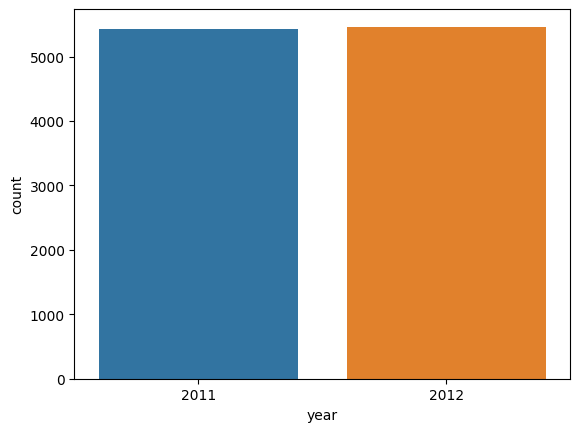

In [10]:
#연도별 데이터셋 갯수 시각화(countplot)
sns.countplot(x='year', data=train)
plt.show()

In [11]:
#월별(month) 평균온도(temp)
pd.DataFrame(train.groupby('month')['temp'].mean())

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


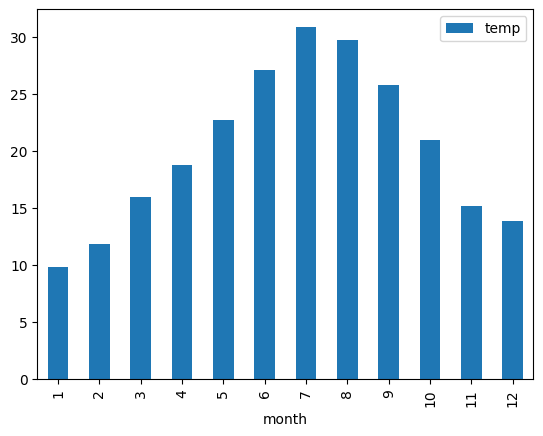

In [20]:
#월별(month) 평균온도(temp) 시각화(bar-dataframe)(kind='bar or line')
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='bar')
plt.show()

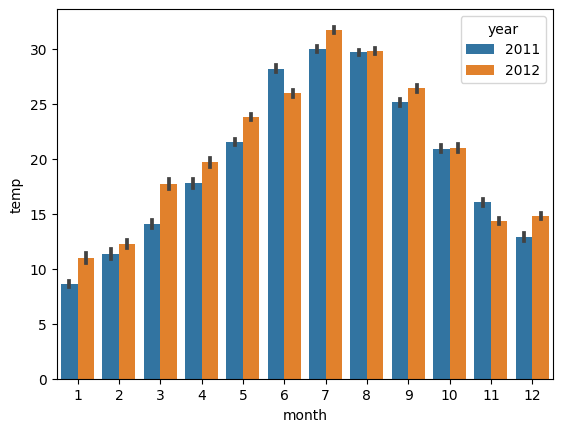

In [14]:
#월별(month) / 연도별(year) 평균온도(temp) 시각화(barplot-seaborn)
sns.barplot(x = 'month', y = 'temp', hue='year', data=train)
plt.show()

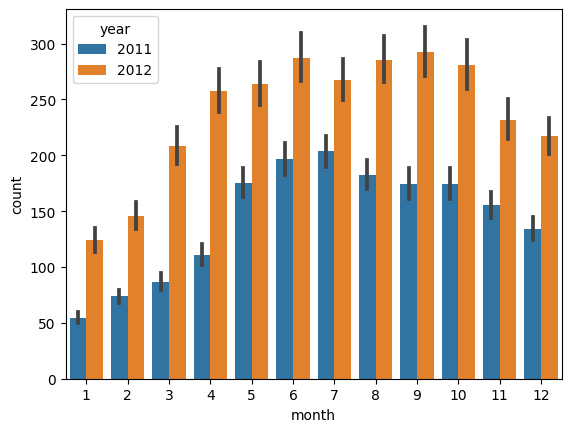

In [16]:
#월별(month) / 연도별(year) 평균 대여량(count : target), 시각화(barplot-seaborn)
sns.barplot(x = 'month', y = 'count', hue='year', data=train)
plt.show()

In [18]:
#분기별 데이터 분포 확인
train['quarter'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: quarter, dtype: int64

In [21]:
#시간별(hour) 데이터 분포 확인
train['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [22]:
#분별(minute) 데이터 분포 확인
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

In [23]:
#초별(second) 데이터 분포 확인
train['second'].value_counts()

0    10886
Name: second, dtype: int64

분(minute)과 초(second)는 분포단일 값임을 확인할수 있다.
-단일값(모두 동일한값)으로 구성된 경우 머신러닝 예측에는 도움되지 않으므로 제거한다.-

In [24]:
#minute, second 제거
train = train.drop(['minute','second'], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4


In [25]:
test = test.drop(['minute','second'], axis = 1)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,quarter,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,4


In [27]:
#weekend컬럼 생성 주말(1), 주중(0)
#요일(dayofweek)컬럼을 참고 dayofweek : 월요일(0), 일요일(6)
train['weekend'] = train['dayofweek'].apply(lambda x : int(x in [5,6]))
train['weekend'].head()

0    1
1    1
2    1
3    1
4    1
Name: weekend, dtype: int64

In [28]:
test['weekend'] = test['dayofweek'].apply(lambda x : int(x in [5,6]))
test['weekend'].head()

0    0
1    0
2    0
3    0
4    0
Name: weekend, dtype: int64

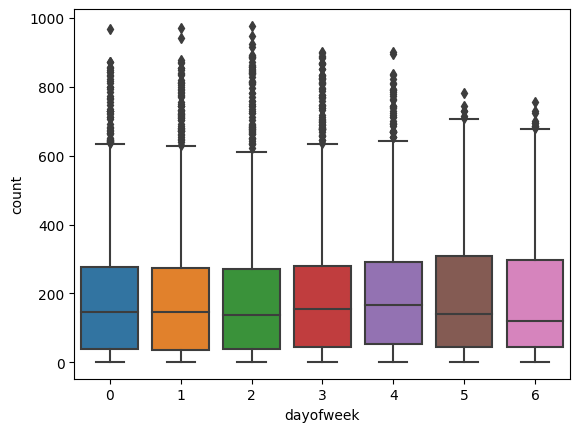

In [29]:
#요일별 자전거 데이터 시각화(bosplot)
sns.boxplot(x = 'dayofweek', y = 'count', data=train)
plt.show()

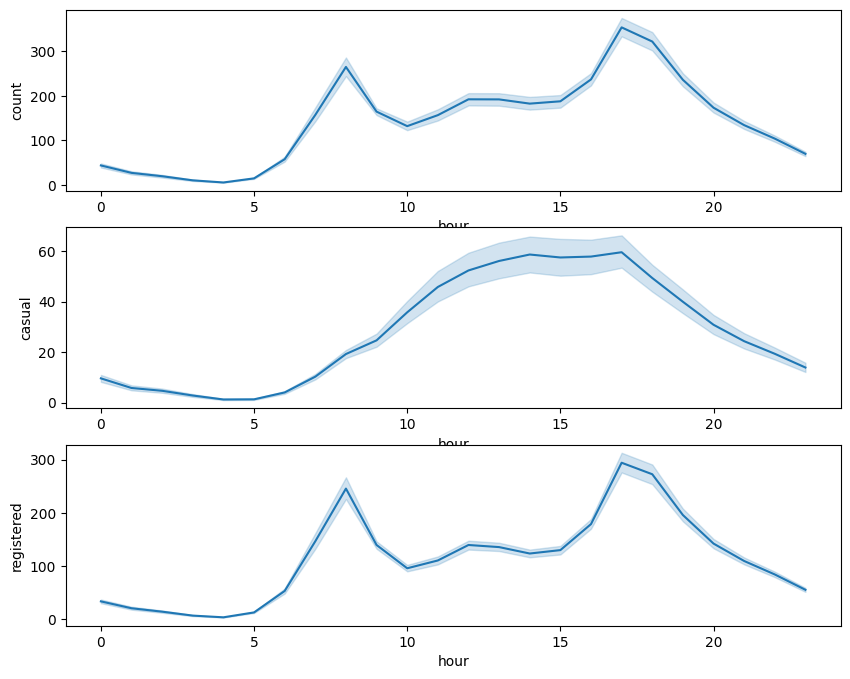

In [33]:
#2011년 요일별 자전거 데이터 시각화(pointplot)
fig, axes = plt.subplots(3,1)
fig.set_size_inches(10,8)
sns.lineplot(x = 'hour', y = 'count', data=train.loc[train['year']==2011], ax=axes[0])
sns.lineplot(x = 'hour', y = 'casual', data=train.loc[train['year']==2011], ax=axes[1])
sns.lineplot(x = 'hour', y = 'registered', data=train.loc[train['year']==2011], ax=axes[2])
plt.show()

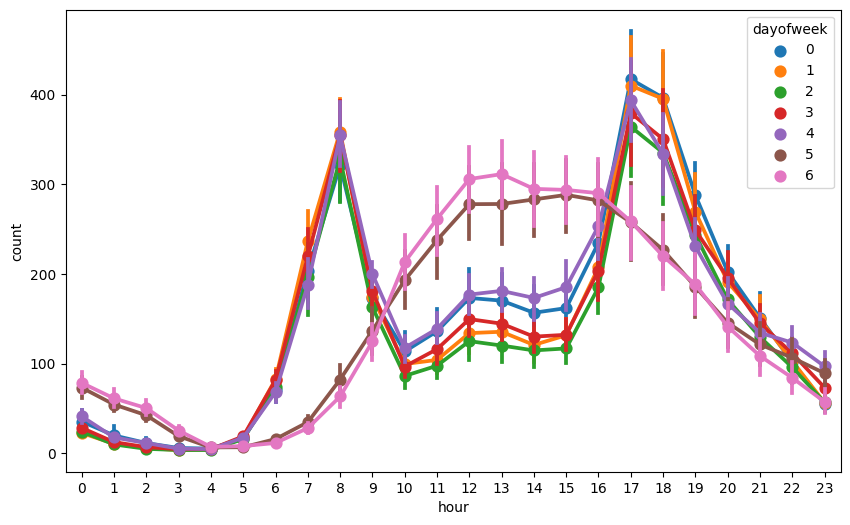

In [34]:
#2011년 요일별 자전거 데이터 시각화(pointplot)
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='count', hue='dayofweek', data=train.loc[train['year']==2011])
plt.show()

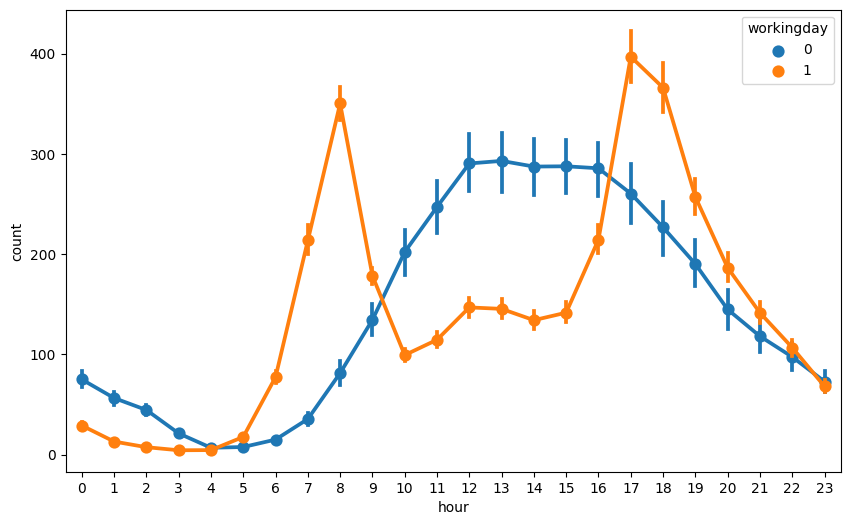

In [35]:
#2011년 workingday별 자전거 데이터 시각화(pointplot)
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='count', hue='workingday', data=train.loc[train['year']==2011])
plt.show()

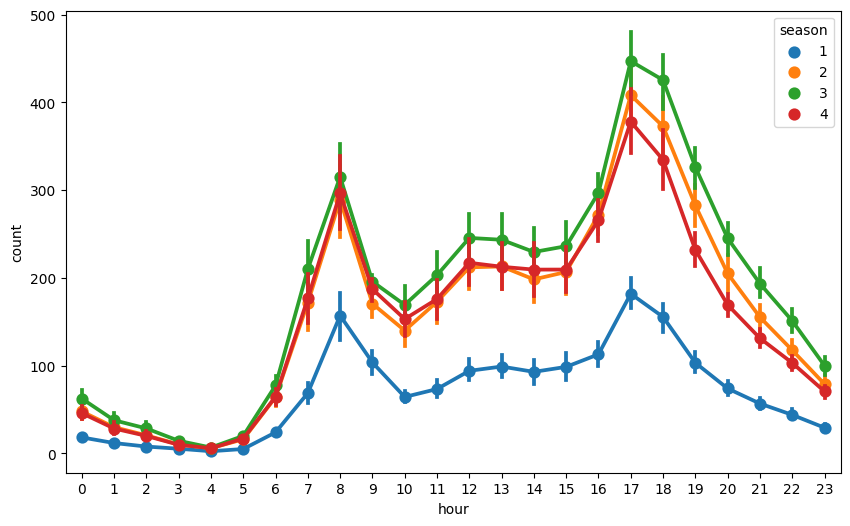

In [36]:
#2011년 season별 자전거 데이터 시각화(pointplot)
plt.figure(figsize=(10,6))
sns.pointplot(x='hour', y='count', hue='season', data=train.loc[train['year']==2011])
plt.show()

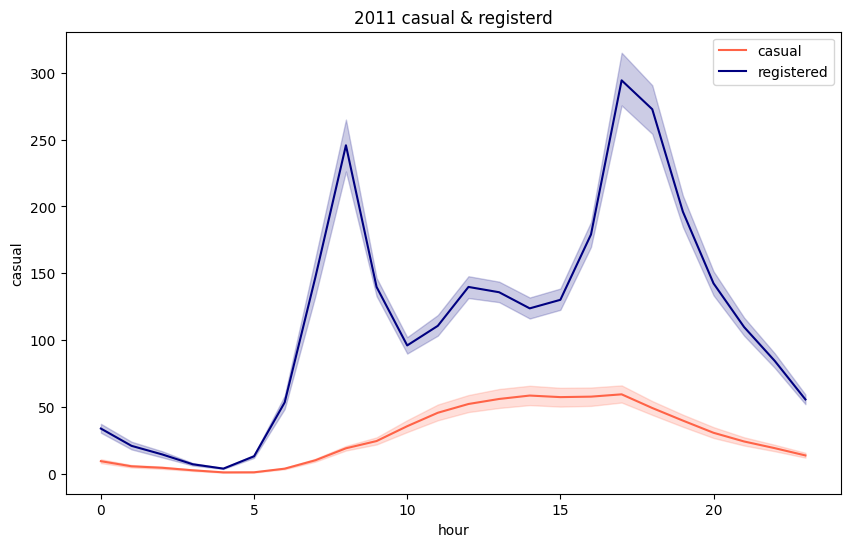

In [67]:
#2011년 요일별 자전거 데이터 시각화(lineplot)
plt.figure(figsize=(10,6))
sns.lineplot(x = 'hour', y='casual', data = train.loc[train['year']==2011], color='tomato', label='casual')
sns.lineplot(x = 'hour', y='registered', data = train.loc[train['year']==2011], color='navy', label='registered')
plt.title('2011 casual & registerd')
plt.legend()
plt.show()


In [37]:
#상관관계 출력 
train[['temp','atemp','weather','count','casual','registered']].corr()

,temp,atemp,weather,count,casual,registered
temp,1.000000,0.984948,-0.055035,0.394454,0.467097,0.318571
atemp,0.984948,1.000000,-0.055376,0.389784,0.462067,0.314635
weather,-0.055035,-0.055376,1.000000,-0.128655,-0.135918,-0.109340
count,0.394454,0.389784,-0.128655,1.000000,0.690414,0.970948
casual,0.467097,0.462067,-0.135918,0.690414,1.000000,0.497250
registered,0.318571,0.314635,-0.109340,0.970948,0.497250,1.000000


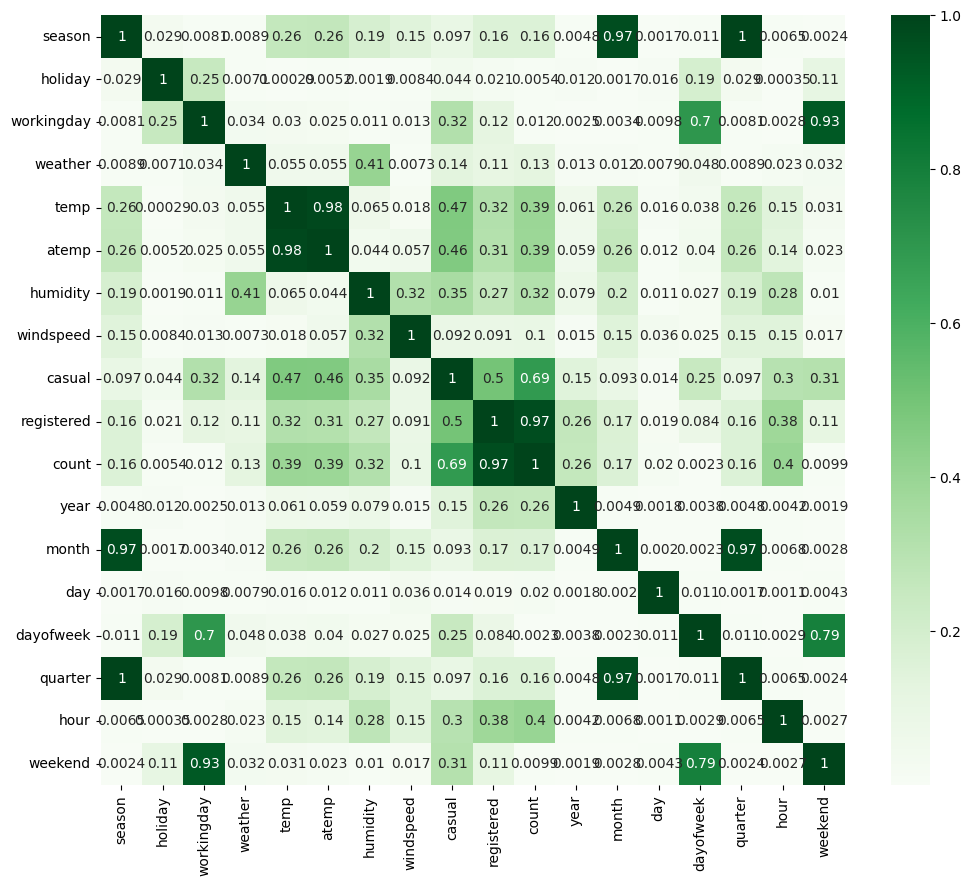

In [51]:
#train데이터셋 all컬럼 상관관계 시각화(heatmap)
plt.figure(figsize=(12,10))
sns.heatmap(abs(train.corr()),annot=True, cmap='Greens')
plt.show()

다중공선성 문제(Multicollinearity) : 통계학인 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제
해결법 : 상관관계가 높은 독립변수중 하나를 제거하거나 변수를 변환한다.


In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
train_temp = pca.fit_transform(train[['temp','atemp']])
test_temp = pca.transform(test[['temp', 'atemp']])

#검증코드
assert train_temp[10].round(3) == 6.063
assert test_temp[10].round(3) == 15.526

In [55]:
#temp, atemp 컬럼 제거후 'temp_pca' 컬럼을 생성 train_temp, test_temp 를 대입
train = train.drop(['temp', 'atemp'],axis=1)
test = test.drop(['temp', 'atemp'],axis = 1)

train['temp_pca'] = train_temp
test['temp_pca'] = test_temp

In [56]:
train.head()

,datetime,season,holiday,workingday,weather,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,weekend,temp_pca
0,2011-01-01 00:00:00,1,0,0,1,81,0.0,3,13,16,2011,1,1,5,1,0,1,13.848653
1,2011-01-01 01:00:00,1,0,0,1,80,0.0,8,32,40,2011,1,1,5,1,1,1,14.963061
2,2011-01-01 02:00:00,1,0,0,1,80,0.0,5,27,32,2011,1,1,5,1,2,1,14.963061
3,2011-01-01 03:00:00,1,0,0,1,75,0.0,3,10,13,2011,1,1,5,1,3,1,13.848653
4,2011-01-01 04:00:00,1,0,0,1,75,0.0,0,1,1,2011,1,1,5,1,4,1,13.848653


In [57]:
#검증코드
assert train.shape == (10886, 18)
assert test.shape == (6493, 15)

In [58]:
#count 컬럼의 대한 상관관계 출력(내림차순)
#상관계수 절댓값(abs)
pd.DataFrame(abs(train.corr())['count'].sort_values(ascending=False))

,count
count,1.000000
registered,0.970948
casual,0.690414
hour,0.400601
temp_pca,0.393394
humidity,0.317371
year,0.260403
month,0.166862
quarter,0.163439
season,0.163439


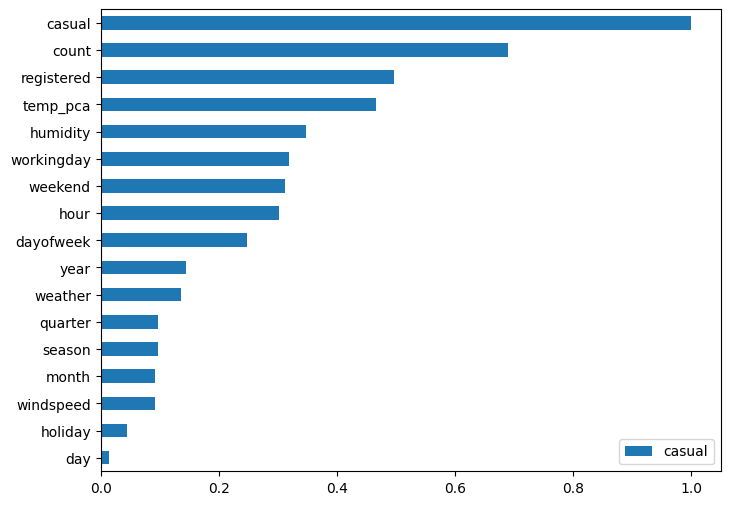

In [63]:
#casual 컬럼에 대한 상관관계 시각화(dataframe - barh)
#상관계수 절댓값(abs)
pd.DataFrame(abs(train.corr())['casual'].sort_values(ascending=True)).plot(kind='barh', figsize=(8,6))
plt.show()